In [1]:
from pynq import Overlay
from pynq.lib.video import *

base = Overlay("./overlay/hdmi.bit")
# hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

## Getting started

First we'll use the default pixel format which is 24 bit-per-pixel BGR formatted data for ease of use with OpenCV. 

In [2]:
# monitor configuration: 640*480 @ 60Hz
Mode = VideoMode(640,480,24)
# hdmi_out = base.video.hdmi_out
hdmi_out.configure(Mode,PIXEL_BGR)
hdmi_out.start()

In [3]:
# monitor (output) frame buffer size
frame_out_w = 1280
frame_out_h = 960
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

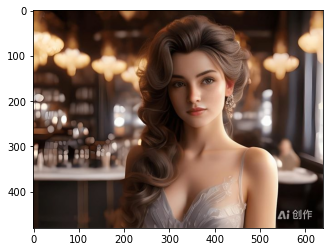

In [4]:
# import os
# os.environ["OPENCV_LOG_LEVEL"]="SILENT"     # 不显示os来的信息，主要为是否检测到usb webcam

# jupyternotebook 显示原始图片
import matplotlib.pyplot as plt
import matplotlib.image as img
image = img.imread('./image/webcam.jpg') 
plt.imshow(image)

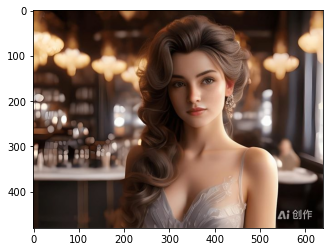

In [5]:
# initialize camera from OpenCV
import cv2
orig_img_path = 'image/webcam.jpg'
!fswebcam --no-banner --resolution 640x480 --save {orig_img_path} -d /dev/video0 2> /dev/null        #如果webcam 存在，替换原图
# jupyternotebook 显示webcam图片
image = img.imread('./image/webcam.jpg') 
plt.imshow(image)

In [ ]:
img = PIL_Image.open(orig_img_path)
img_array = cv2.imread(orig_img_path) 
# 分配内存
buffer = allocate(shape=img_array.shape, dtype=np.uint8, cacheable=True)
# 将 NumPy 数组复制到分配的内存缓冲区中
buffer[:] = img_array
hdmi_out.writeframe(buffer)          #向HDMI out显示

In [ ]:
#del buffer
#del img_array
#hdmi_out.stop()

In [ ]:
#img=cv2.imread('640_480.png')
#buffer= allocate(shape=(480,640,3),dtype=np.uint8, cacheable=True)
#buffer[:]=img[:]
#hdmi_out.writeframe(buffer)

In [ ]:
# Capture webcam image
#import numpy as np
#ret, frame_vga = videoIn.read()
# Display webcam image via HDMI Out
#if (ret):      
#    outframe = hdmi_out.newframe()
#    outframe[0:480,0:640,:] = frame_vga[0:480,0:640,:]
#    hdmi_out.writeframe(outframe)
#else:
#    raise RuntimeError("Failed to read from camera.")

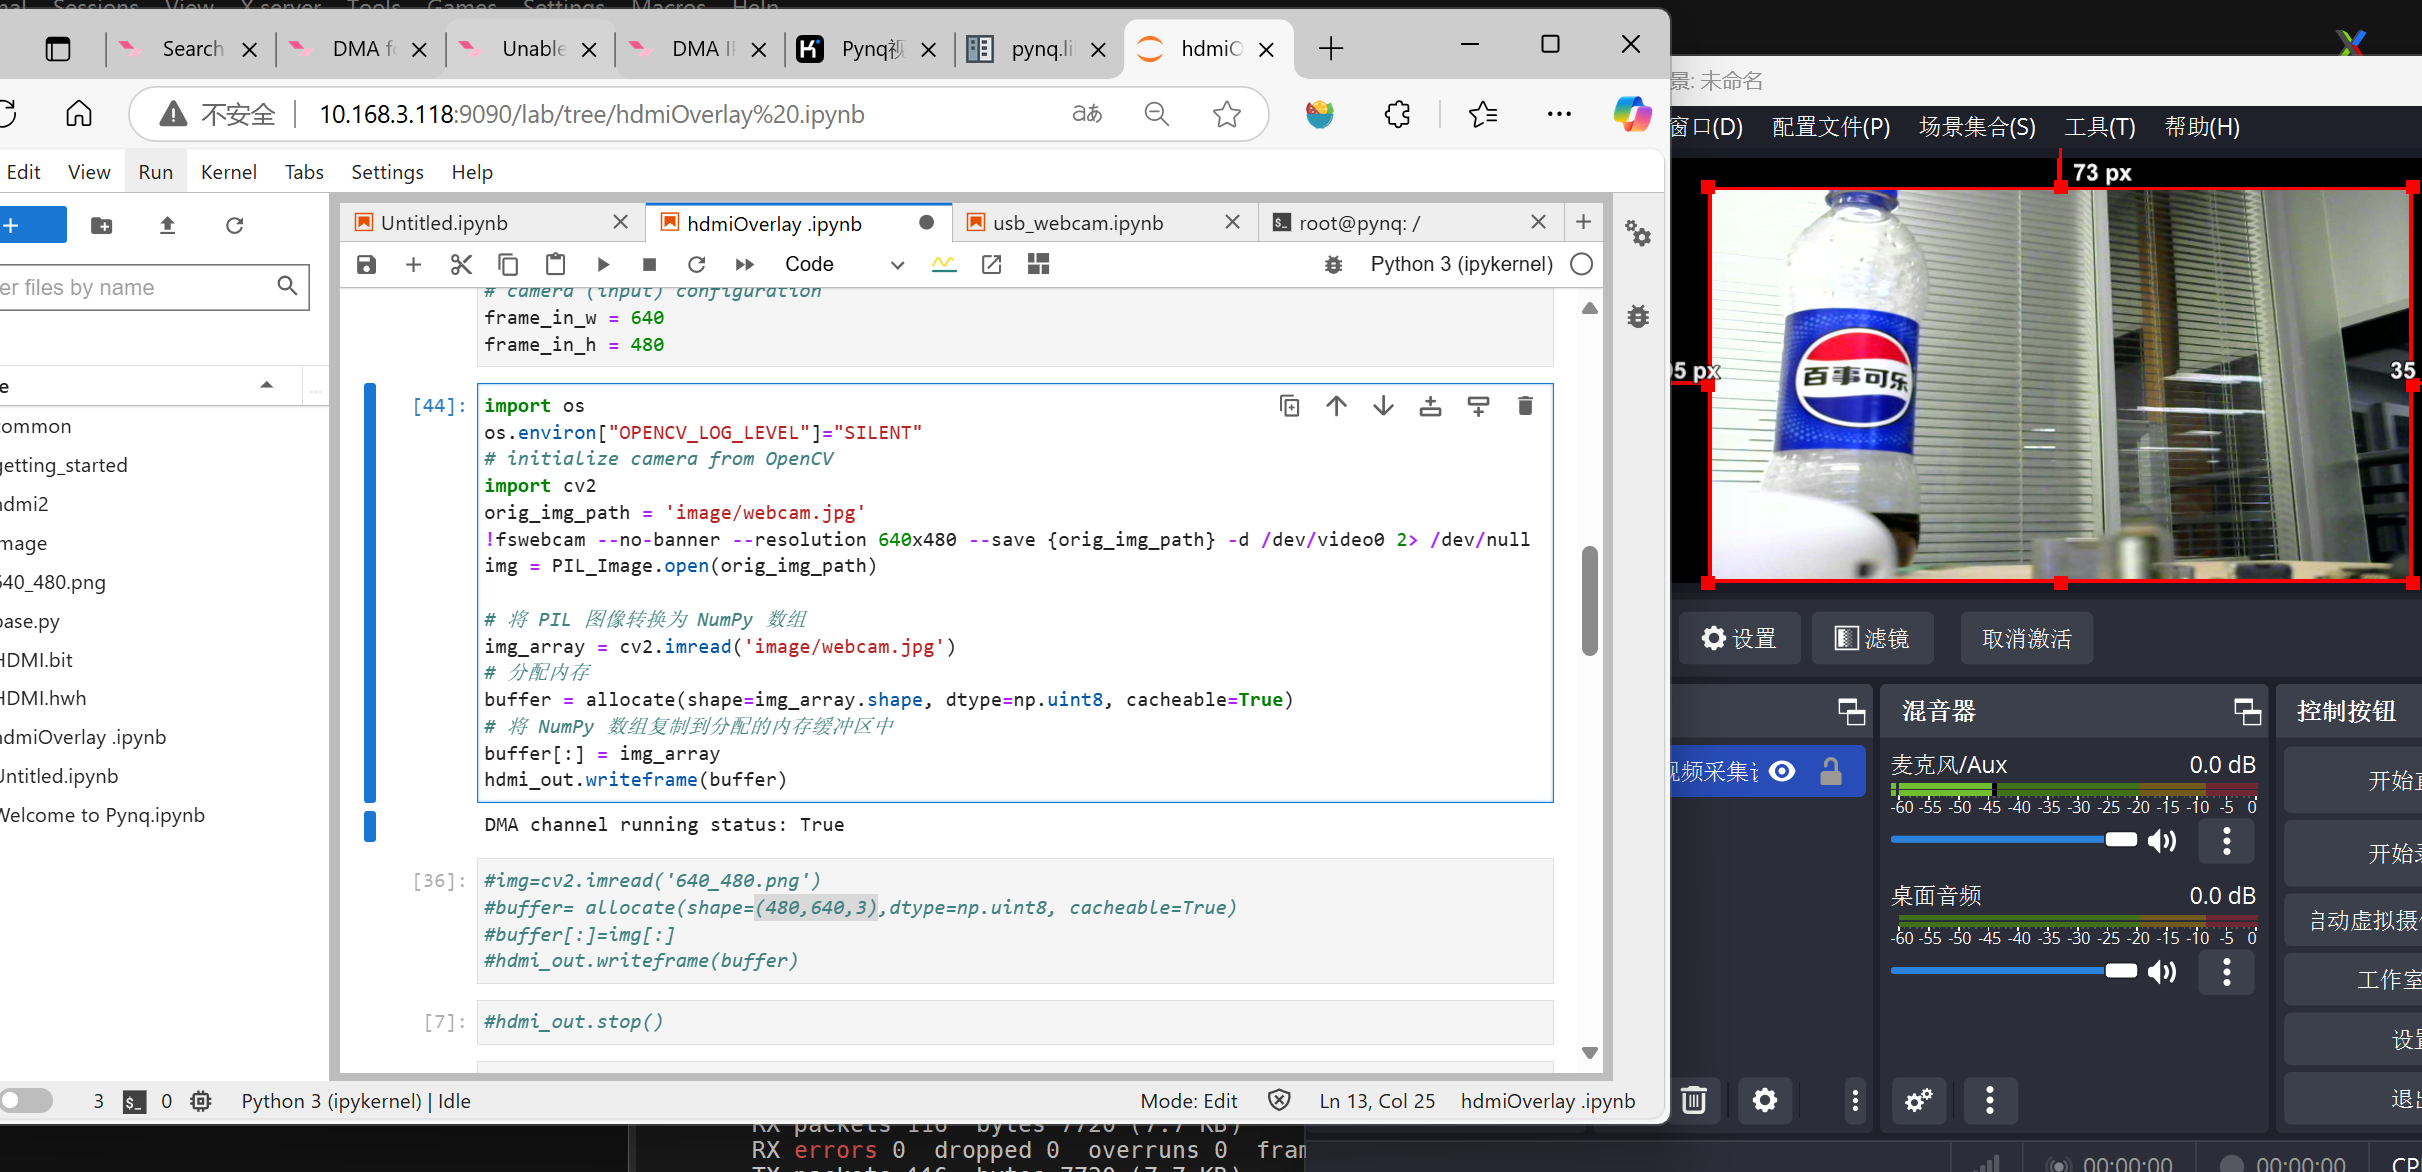